In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import preprocessing
from sklearn.svm import SVR
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import joblib

In [2]:
aggregation_data=pd.read_parquet('../data/processed_data/aggregation_data.parquet')
aggregation_data=aggregation_data.reset_index()
aggregation_data=aggregation_data.rename(columns={'TEMPERATURE': 'temperature','Dew_Point':'dew_point','Wind_Direction':'wind_direction',
                  'Wind_Speed':'wind_speed','day_of_month':'month'})
aggregation_data.head()

,YEAR_MONTH_DAY_HOUR,PULocationID,temperature,dew_point,wind_direction,wind_speed,hour_of_day,day_of_week,month,pick_ups,mean_amount,mean_income_rate
0,2021010100,4,4.4,-3.3,320.0,6.7,0,4,1,3.0,21.466667,1.320380
1,2021010100,7,4.4,-3.3,320.0,6.7,0,4,1,1.0,24.500000,0.907407
2,2021010100,13,4.4,-3.3,320.0,6.7,0,4,1,2.0,26.050000,2.021795
3,2021010100,17,4.4,-3.3,320.0,6.7,0,4,1,2.0,16.150000,1.517568
4,2021010100,24,4.4,-3.3,320.0,6.7,0,4,1,6.0,18.523333,1.599196


In [3]:
aggregation_data[["pick_ups","mean_amount","mean_income_rate"]].describe()

,pick_ups,mean_amount,mean_income_rate
count,941309.000000,941309.000000,941309.000000
mean,30.616409,18.671913,1.403505
std,47.357600,4.970434,0.283075
min,1.000000,0.300000,0.352941
25%,2.000000,15.896667,1.221764
50%,8.000000,17.595647,1.395150
75%,42.000000,20.734444,1.580262
max,797.000000,38.430000,2.439917


In [4]:
X=aggregation_data[['PULocationID','temperature','dew_point','wind_speed','hour_of_day','day_of_week','month']]

In [5]:
X.head()

,PULocationID,temperature,dew_point,wind_speed,hour_of_day,day_of_week,month
0,4,4.4,-3.3,6.7,0,4,1
1,7,4.4,-3.3,6.7,0,4,1
2,13,4.4,-3.3,6.7,0,4,1
3,17,4.4,-3.3,6.7,0,4,1
4,24,4.4,-3.3,6.7,0,4,1


In [6]:
min_max_scaler = preprocessing.StandardScaler()
origin_data=np.array(aggregation_data[['temperature','dew_point','wind_speed']])
print(origin_data.shape)
scaled_data = min_max_scaler.fit_transform(origin_data)
print(scaled_data)

(941309, 3)
[[-0.74952858 -0.70886621  0.51467435]
 [-0.74952858 -0.70886621  0.51467435]
 [-0.74952858 -0.70886621  0.51467435]
 ...
 [-0.09210423 -0.35410896  0.51467435]
 [-0.09210423 -0.35410896  0.51467435]
 [-0.09210423 -0.35410896  0.51467435]]


In [7]:
PULocationID=np.array(aggregation_data['PULocationID'])
PULocationID=PULocationID.reshape(len(PULocationID),-1)
PULocationID=preprocessing.OneHotEncoder().fit_transform(PULocationID).toarray()
print(np.shape(PULocationID))

(941309, 259)


In [8]:
hour_of_day=np.array(aggregation_data['hour_of_day'])
hour_of_day=hour_of_day.reshape(len(hour_of_day),-1)
hour_of_day=preprocessing.OneHotEncoder().fit_transform(hour_of_day).toarray()
print(np.shape(hour_of_day))

(941309, 24)


In [9]:
day_of_week=np.array(aggregation_data['day_of_week'])
day_of_week=day_of_week.reshape(len(day_of_week),-1)
day_of_week=preprocessing.OneHotEncoder().fit_transform(day_of_week).toarray()
print(np.shape(day_of_week))

(941309, 7)


In [10]:
month=np.array(aggregation_data['month'])
month=month.reshape(len(month),-1)
month=preprocessing.OneHotEncoder().fit_transform(month).toarray()
print(np.shape(month))

(941309, 12)


In [16]:
X=np.concatenate((PULocationID,hour_of_day,day_of_week,month,scaled_data),axis=1)
print(X.shape)

(941309, 305)


In [12]:
y1=np.array(aggregation_data[['pick_ups']])
y2=np.array(aggregation_data[['mean_amount']])
y3=np.array(aggregation_data[['mean_income_rate']])

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y1, random_state=1,test_size=0.2)

Train Data X Shape (753047, 305), y Shape (753047, 1)
Test Data X Shape (188262, 305), y Shape (188262, 1)


/home/lichuang/miniconda3/envs/mast/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MSE: 207.6490537736287
RMSE 14.410033094119829


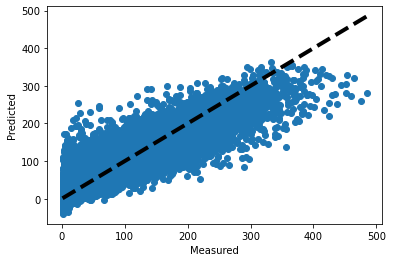

In [32]:
print("Train Data X Shape %s, y Shape %s" % (X_train.shape, y_train.shape))
print("Test Data X Shape %s, y Shape %s" % (X_test.shape, y_test.shape))
# model = LinearRegression()
# model = KNeighborsRegressor()
# model = SVR()
model=MLPRegressor()
model.fit(X_train, np.array(y_train).ravel())
y_pred = model.predict(X_test)
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
# scatter 画点
plt.scatter(y_test, y_pred)
# plot 画线
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel("Measured")
plt.ylabel("Predicted")
plt.show()

In [ ]:
joblib.dump(model, '../model/MLP_Y1.model')

MSE: 207.6490537736287
RMSE 14.410033094119829
MAE 8.084014002880771


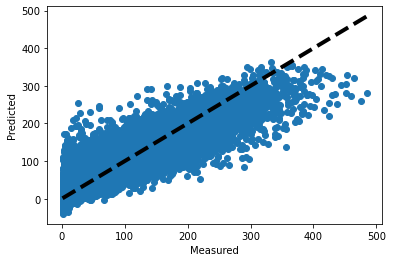

In [19]:
model = joblib.load( '../model/MLP_Y1.model')
y_pred = model.predict(X_test)
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("MAE", metrics.mean_absolute_error (y_test, y_pred))
# scatter 画点
plt.scatter(y_test, y_pred)
# plot 画线
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel("Measured")
plt.ylabel("Predicted")
plt.show()

Train Data X Shape (753047, 305), y Shape (753047, 1)
Test Data X Shape (188262, 305), y Shape (188262, 1)
MSE: 909.5201768544434
RMSE 30.158252218164822
MAE 19.791631559342832


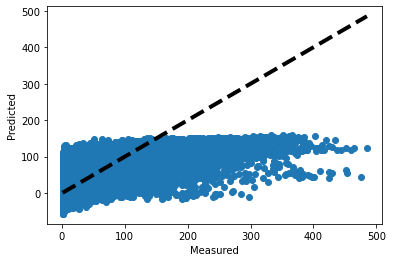

['../model/LR_Y1.model']

In [21]:
print("Train Data X Shape %s, y Shape %s" % (X_train.shape, y_train.shape))
print("Test Data X Shape %s, y Shape %s" % (X_test.shape, y_test.shape))
model = LinearRegression()
model.fit(X_train, np.array(y_train).ravel())
y_pred = model.predict(X_test)
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("MAE", metrics.mean_absolute_error (y_test, y_pred))
# scatter 画点
plt.scatter(y_test, y_pred)
# plot 画线
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel("Measured")
plt.ylabel("Predicted")
plt.show()
joblib.dump(model, '../model/LR_Y1.model')

(941309, 305)
Train Data X Shape (753047, 305), y Shape (753047, 1)
Test Data X Shape (188262, 305), y Shape (188262, 1)
MSE: 0.05363520504877481
RMSE 0.23159275690050155
MAE 0.1626609195787966


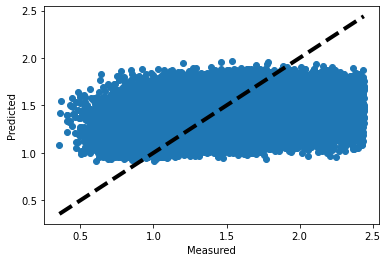

['../model/LR_Y3.model']

In [19]:
X=np.concatenate((PULocationID,hour_of_day,day_of_week,month,scaled_data),axis=1)
print(X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y3, random_state=1,test_size=0.2)
print("Train Data X Shape %s, y Shape %s" % (X_train.shape, y_train.shape))
print("Test Data X Shape %s, y Shape %s" % (X_test.shape, y_test.shape))
model=LinearRegression()
model.fit(X_train, np.array(y_train).ravel())
y_pred = model.predict(X_test)
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("MAE", metrics.mean_absolute_error (y_test, y_pred))
# scatter 画点
plt.scatter(y_test, y_pred)
# plot 画线
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel("Measured")
plt.ylabel("Predicted")
plt.show()
joblib.dump(model, '../model/LR_Y3.model')

(941309, 305)
Train Data X Shape (753047, 305), y Shape (753047, 1)
Test Data X Shape (188262, 305), y Shape (188262, 1)
MSE: 0.048262845297253824
RMSE 0.21968806362033833
MAE 0.14603514841152046


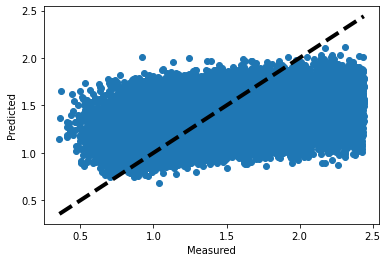

['../model/MLP_Y3.model']

In [18]:
X=np.concatenate((PULocationID,hour_of_day,day_of_week,month,scaled_data),axis=1)
print(X.shape)
X_train, X_test, y_train, y_test = train_test_split(X, y3, random_state=1,test_size=0.2)
print("Train Data X Shape %s, y Shape %s" % (X_train.shape, y_train.shape))
print("Test Data X Shape %s, y Shape %s" % (X_test.shape, y_test.shape))
model=MLPRegressor()
model.fit(X_train, np.array(y_train).ravel())
y_pred = model.predict(X_test)
print("MSE:", metrics.mean_squared_error(y_test, y_pred))
print("RMSE", np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("MAE", metrics.mean_absolute_error (y_test, y_pred))
# scatter 画点
plt.scatter(y_test, y_pred)
# plot 画线
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=4)
plt.xlabel("Measured")
plt.ylabel("Predicted")
plt.show()
joblib.dump(model, '../model/MLP_Y3.model')